![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/05_Cluster%20Analysis%20con%20k-Means/05_clustering-kmeans_session_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


# 05 | Cluster Analysis with k-Means

## Machine Learning Review

- **Supervised Learning:**
    - Regression → Predicting a Numerical Variable
    - Classification → Predicting a Categorical Variable


- **Unsupervised Learning:**
    - Cluster Analysis → Groups based on Explanatory Variables

In [1]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

## [ ] Load the Data

- Simply execute the following lines of code to load the data.
- This dataset contains **statistics about Car Accidents** (columns)
- In each one of **USA States** (rows)

https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset/

In [1]:
import seaborn as sns #!
import pandas as pd

df_crashes = sns.load_dataset(name='car_crashes', index_col='abbrev')[['alcohol', 'ins_losses']]
df_crashes

,alcohol,ins_losses
abbrev,,
AL,5.640,145.08
AK,4.525,133.93
...,...,...
WI,4.554,106.62
WY,5.568,122.04


## `KMeans()` Model in Python

### Fit the Model

In [2]:
from sklearn.cluster import KMeans

In [3]:
model_km = KMeans(n_clusters=3)

In [4]:
model_km.fit(X=df_crashes)

KMeans(n_clusters=3)

### Calculate Predictions

In [5]:
model_km.predict(X=df_crashes)

array([0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 2, 1, 0,
       0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2], dtype=int32)

### Create a New DataFrame for the Predictions

In [6]:
df_pred = df_crashes.copy()

In [7]:
df_pred['cluster'] = model_km.predict(X=df_crashes)

In [8]:
df_pred

,alcohol,ins_losses,cluster
abbrev,,,
AL,5.640,145.08,0
AK,4.525,133.93,0
...,...,...,...
WI,4.554,106.62,2
WY,5.568,122.04,2


### [ ] Visualize the Model

<AxesSubplot:xlabel='alcohol', ylabel='ins_losses'>

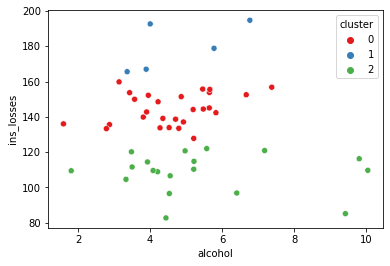

In [9]:
sns.scatterplot(x='alcohol', y='ins_losses', data=df_pred, hue='cluster', palette='Set1')

### Model Interpretation

In [10]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/4b5d3muPQmA" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [11]:
df_pred

,alcohol,ins_losses,cluster
abbrev,,,
AL,5.640,145.08,0
AK,4.525,133.93,0
...,...,...,...
WI,4.554,106.62,2
WY,5.568,122.04,2


In [12]:
import matplotlib.pyplot as plt

(0.0, 200.0)

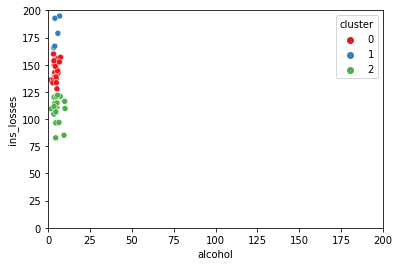

In [13]:
sns.scatterplot(x='alcohol', y='ins_losses', data=df_pred, hue='cluster', palette='Set1')
plt.xlim(0, 200)
plt.ylim(0, 200)

<AxesSubplot:xlabel='alcohol', ylabel='ins_losses'>

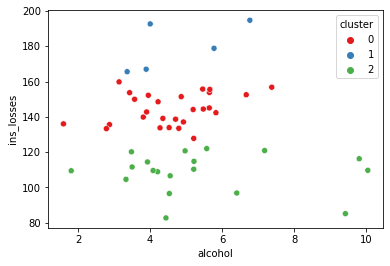

In [14]:
sns.scatterplot(x='alcohol', y='ins_losses', data=df_pred, hue='cluster', palette='Set1')

### [ ] Conclusion

- You need to `scale` the data
- Every time the algorithm computes `distances`
- Between `different variables`
- Because it's **not the same to increase 1kg of weight than 1m of height**

## `MinMaxScaler()` the data

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X=df_crashes)

MinMaxScaler()

In [18]:
df_scaled = pd.DataFrame(scaler.transform(X=df_crashes), columns=df_crashes.columns, index=df_crashes.index)

## `KMeans()` Model with *Scaled Data*

### Fit the Model

In [19]:
model_km.fit(X=df_scaled)

KMeans(n_clusters=3)

### Calculate Predictions

In [20]:
model_km.predict(X=df_scaled)

array([0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 0, 2,
       0, 2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 1, 1, 0, 0,
       2, 2, 0, 2, 0, 2, 2], dtype=int32)

### Create a New DataFrame for the Predictions

In [21]:
df_pred['cluster_scaled'] = model_km.predict(X=df_scaled)

In [22]:
df_pred

,alcohol,ins_losses,cluster,cluster_scaled
abbrev,,,,
AL,5.640,145.08,0,0
AK,4.525,133.93,0,2
...,...,...,...,...
WI,4.554,106.62,2,2
WY,5.568,122.04,2,2


<AxesSubplot:xlabel='alcohol', ylabel='ins_losses'>

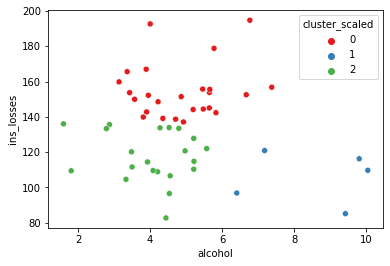

In [23]:
sns.scatterplot(x='alcohol', y='ins_losses', hue='cluster_scaled', data=df_pred, palette='Set1')

<AxesSubplot:xlabel='alcohol', ylabel='ins_losses'>

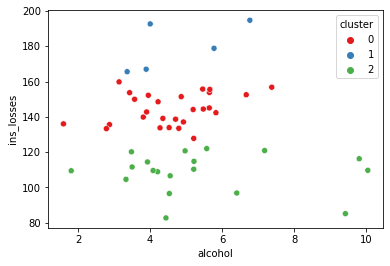

In [24]:
sns.scatterplot(x='alcohol', y='ins_losses', hue='cluster', data=df_pred, palette='Set1')

### [ ] Visualize the Model

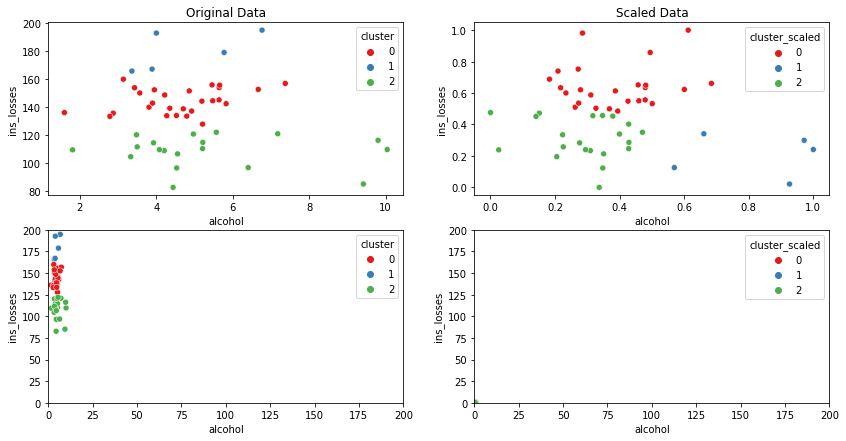

In [25]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(14, 7)) #!

sns.scatterplot(x='alcohol', y='ins_losses', hue='cluster',
                data=df_pred, palette='Set1', ax=ax1);

sns.scatterplot(x='alcohol', y='ins_losses', hue=df_pred.cluster_scaled,
                data=df_scaled, palette='Set1', ax=ax2);

sns.scatterplot(x='alcohol', y='ins_losses', hue='cluster',
                data=df_pred, palette='Set1', ax=ax3);

sns.scatterplot(x='alcohol', y='ins_losses', hue=df_pred.cluster_scaled,
                data=df_scaled, palette='Set1', ax=ax4);

ax3.set_xlim(0, 200)
ax3.set_ylim(0, 200)

ax4.set_xlim(0, 200)
ax4.set_ylim(0, 200)

ax1.set_title('Original Data')
ax2.set_title('Scaled Data');

### Model Interpretation

## [ ] Other `Clustering` Models in Python

- Visit the `sklearn` website [here ↗](https://scikit-learn.org/stable/)
- **Pick 2 new models** and compute the *Clustering*

### Agglomerative Clustering

#### Fit the Model

In [26]:
from sklearn.cluster import AgglomerativeClustering

In [27]:
model_ac = AgglomerativeClustering(n_clusters=3)

In [28]:
model_ac.fit(X=df_scaled)

AgglomerativeClustering(n_clusters=3)

#### Calculate Predictions

In [29]:
model_ac.fit_predict(X=df_scaled)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1])

#### Create a New Column for the Predictions

In [31]:
df_pred['cluster_ac'] = model_ac.fit_predict(X=df_scaled)

In [32]:
df_pred

,alcohol,ins_losses,cluster,cluster_scaled,cluster_ac
abbrev,,,,,
AL,5.640,145.08,0,0,0
AK,4.525,133.93,0,2,0
...,...,...,...,...,...
WI,4.554,106.62,2,2,1
WY,5.568,122.04,2,2,1


#### Visualize the Model

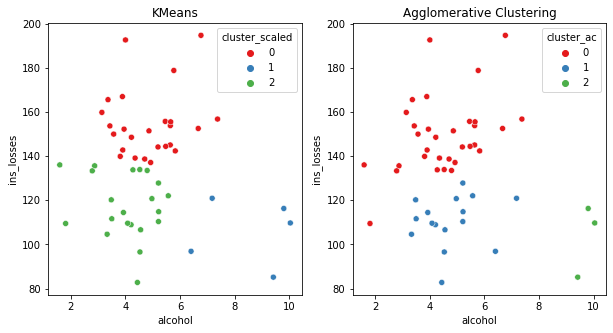

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

sns.scatterplot(x='alcohol', y='ins_losses', hue='cluster_scaled',
                data=df_pred, palette='Set1', ax=ax1);

sns.scatterplot(x='alcohol', y='ins_losses', hue='cluster_ac',
                data=df_pred, palette='Set1', ax=ax2);

ax1.set_title('KMeans')
ax2.set_title('Agglomerative Clustering');

### Spectral Clustering

#### Fit the Model

In [34]:
from sklearn.cluster import SpectralClustering

In [35]:
model_sc = SpectralClustering(n_clusters=3)

In [36]:
model_sc.fit(X=df_scaled)

SpectralClustering(n_clusters=3)

#### Calculate Predictions

In [37]:
model_sc.fit_predict(X=df_scaled)

array([1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2,
       1, 2, 1, 1, 0, 2, 1, 2, 1, 2, 1, 2, 0, 1, 1, 2, 1, 1, 0, 2, 1, 1,
       2, 2, 1, 2, 1, 2, 2], dtype=int32)

#### Create a New Column for the Predictions

In [39]:
df_pred['cluster_sc'] = model_sc.fit_predict(X=df_scaled)

In [40]:
df_pred

,alcohol,ins_losses,cluster,cluster_scaled,cluster_ac,cluster_sc
abbrev,,,,,,
AL,5.640,145.08,0,0,0,1
AK,4.525,133.93,0,2,0,0
...,...,...,...,...,...,...
WI,4.554,106.62,2,2,1,0
WY,5.568,122.04,2,2,1,0


#### Visualize the Model

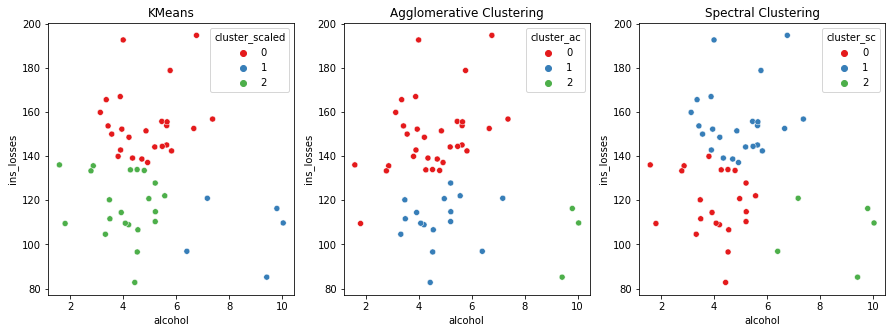

In [41]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.set_title('KMeans')
sns.scatterplot(x='alcohol', y='ins_losses', hue='cluster_scaled',
                data=df_pred, palette='Set1', ax=ax1);

ax2.set_title('Agglomerative Clustering')
sns.scatterplot(x='alcohol', y='ins_losses', hue='cluster_ac',
                data=df_pred, palette='Set1', ax=ax2);

ax3.set_title('Spectral Clustering')
sns.scatterplot(x='alcohol', y='ins_losses', hue='cluster_sc',
                data=df_pred, palette='Set1', ax=ax3);

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.